In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.mixed_linear_model import MixedLMParams
from scipy.stats import chi2



# Hypothesis:

## The interventions had a positive and lasting effect on the participants happiness.

## The interventions also decreased the level of depression experienced by the participants.

In [2]:
happy_df = pd.read_csv('happy_ahi-cesd.csv')

In [3]:
happy_df.head(10)

,id,occasion,elapsed.days,intervention,ahi01,ahi02,ahi03,ahi04,ahi05,ahi06,...,cesd13,cesd14,cesd15,cesd16,cesd17,cesd18,cesd19,cesd20,ahiTotal,cesdTotal
0,1,0,0.000000,4,2,3,2,3,3,2,...,2,3,1,2,1,1,2,2,63,14
1,1,1,11.772731,4,3,3,4,3,3,4,...,1,2,1,3,1,1,1,1,73,6
2,2,0,0.000000,1,3,4,3,4,2,3,...,1,1,1,4,1,1,1,1,73,7
3,2,1,8.017523,1,3,4,4,4,3,3,...,1,1,1,3,1,1,1,1,89,10
4,2,2,14.304086,1,3,4,4,4,3,3,...,3,1,1,1,1,1,1,1,89,13
5,2,3,31.983565,1,3,4,4,4,4,4,...,1,1,1,3,1,1,1,1,93,8
6,2,4,92.176701,1,3,3,2,3,3,3,...,3,1,1,3,1,2,1,1,80,15
7,2,5,182.353194,1,3,3,3,4,2,3,...,3,3,1,4,2,2,1,1,77,12
8,3,0,0.000000,4,3,3,2,4,2,3,...,1,2,1,4,1,1,1,1,77,3
9,3,2,16.427546,4,3,3,3,4,4,4,...,2,2,1,4,1,1,1,1,85,5


In [4]:
happy_df.tail()

,id,occasion,elapsed.days,intervention,ahi01,ahi02,ahi03,ahi04,ahi05,ahi06,...,cesd13,cesd14,cesd15,cesd16,cesd17,cesd18,cesd19,cesd20,ahiTotal,cesdTotal
987,292,0,0.000000,4,2,2,2,2,2,4,...,2,2,1,3,2,3,1,4,50,30
988,292,1,9.940718,4,4,3,2,3,3,4,...,2,1,1,4,1,1,1,3,70,6
989,293,0,0.000000,2,2,2,2,2,2,1,...,1,3,1,2,1,2,1,3,47,18
990,294,0,0.000000,3,3,3,2,3,3,3,...,2,2,1,3,1,1,1,1,70,7
991,295,0,0.000000,1,3,3,2,3,2,3,...,1,1,1,4,1,2,1,1,65,6


In [5]:
happy_df.shape

(992, 50)

In [6]:
happy_participants_df = pd.read_csv('happy_participant-info.csv')

In [7]:
happy_participants_df.head()

,id,intervention,sex,age,educ,income
0,1,4,2,35,5,3
1,2,1,1,59,1,1
2,3,4,1,51,4,3
3,4,3,1,50,5,2
4,5,2,2,58,5,2


In [8]:
happy_df.at[26, 'occasion'] = 3
happy_df.at[27, 'occasion'] = 4
happy_df.at[28, 'occasion'] = 5

In [10]:
total_participation = happy_df.groupby('id').filter(lambda x: len(x) == 6)

In [11]:
total_participation.head(10)

,id,occasion,elapsed.days,intervention,ahi01,ahi02,ahi03,ahi04,ahi05,ahi06,...,cesd13,cesd14,cesd15,cesd16,cesd17,cesd18,cesd19,cesd20,ahiTotal,cesdTotal
2,2,0,0.000000,1,3,4,3,4,2,3,...,1,1,1,4,1,1,1,1,73,7
3,2,1,8.017523,1,3,4,4,4,3,3,...,1,1,1,3,1,1,1,1,89,10
4,2,2,14.304086,1,3,4,4,4,3,3,...,3,1,1,1,1,1,1,1,89,13
5,2,3,31.983565,1,3,4,4,4,4,4,...,1,1,1,3,1,1,1,1,93,8
6,2,4,92.176701,1,3,3,2,3,3,3,...,3,1,1,3,1,2,1,1,80,15
7,2,5,182.353194,1,3,3,3,4,2,3,...,3,3,1,4,2,2,1,1,77,12
23,8,0,0.000000,2,3,2,2,2,2,1,...,2,2,1,2,2,4,2,3,59,30
24,8,1,8.800764,2,2,2,1,2,2,1,...,2,4,2,1,1,4,3,4,45,45
25,8,2,21.919271,2,2,1,1,1,1,1,...,4,4,3,1,3,4,4,4,38,55
26,8,3,38.900451,2,2,2,1,1,2,1,...,2,4,3,1,4,4,3,3,44,49


## Visualizing the data

### Happiness:

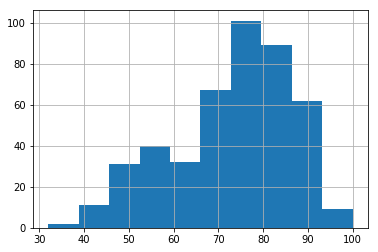

In [12]:
total_participation.ahiTotal.hist()
plt.show()

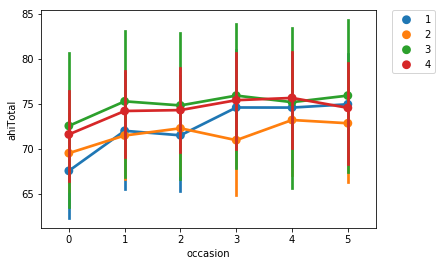

In [13]:
# Looking for overall patterns
sns.axes_style("white")
sns.pointplot(x="occasion"
            ,y="ahiTotal"
            ,hue='intervention'
            ,data=total_participation)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

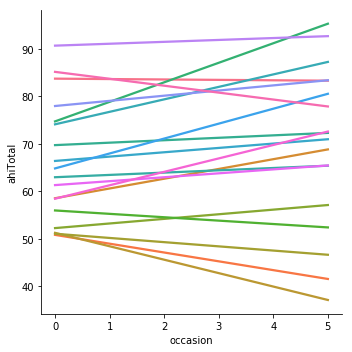

In [14]:
# Looking at trajectories of change for the first 30 respondents
sns.axes_style("white")
sns.lmplot(x="occasion"
           , y="ahiTotal"
           , hue='id'
           , data=total_participation.loc[total_participation['id']<70,:]
           , ci=None
           , scatter_kws={'alpha':0.3}
           , legend=None
           , markers=""
           , truncate=True
          )
plt.show()

### Depression:

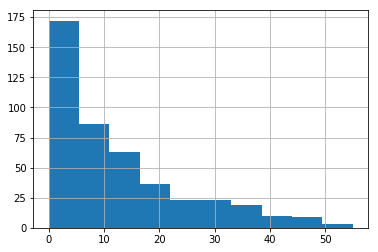

In [15]:
total_participation.cesdTotal.hist()
plt.show()

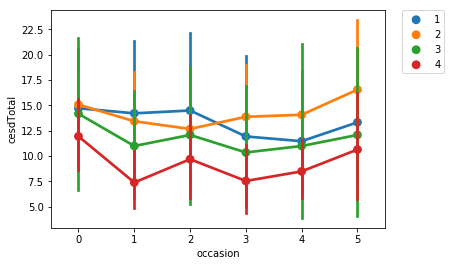

In [16]:
# Looking for overall patterns
sns.axes_style("white")
sns.pointplot(x="occasion"
            ,y="cesdTotal"
            ,hue='intervention'
            ,data=total_participation)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

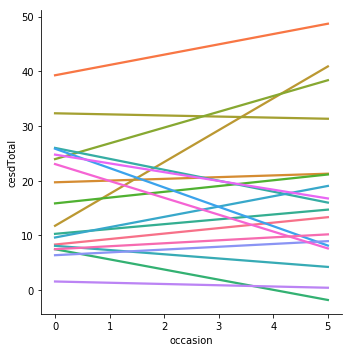

In [17]:
# Looking at trajectories of change for the first 30 respondents
sns.axes_style("white")
sns.lmplot(x="occasion"
           , y="cesdTotal"
           , hue='id'
           , data=total_participation.loc[total_participation['id']<70,:]
           , ci=None
           , scatter_kws={'alpha':0.3}
           , legend=None
           , markers=""
           , truncate=True
          )
plt.show()

### Happiness vs Depression

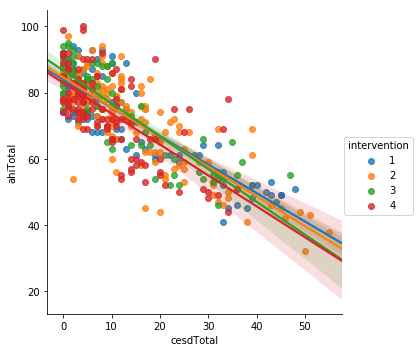

In [20]:
sns.lmplot(x="cesdTotal", y="ahiTotal", hue='intervention', data=total_participation)
plt.show()

## Checking Assumptions:

1) Normal distribution: Happiness is sufficiently normally distributed. The Depression is not as normally distributed, but leans more to the right.

2) The graphs show that there is an overall trend moving upwards in the happiness scores. The depression scores go lowerer except for the group 2 intervention.


In [27]:
# Model to use for calculating the ICC
print('running...')
model = smf.mixedlm("ahiTotal ~ intervention",data=total_participation,groups=total_participation['id'])
result = model.fit(method='nm',maxiter=200, full_output=True)
print(result.summary())
print("done!")

# Function to calculate the intraclass correlation
def ICC(fittedmodel):
    between_var= fittedmodel.cov_re.iloc[0,0]
    resid=fittedmodel.scale
    icc=between_var/(between_var+resid)
    return icc

print('The Intraclass Correlation is: {}'.format(ICC(result)))

running...
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ahiTotal  
No. Observations: 444     Method:             REML      
No. Groups:       74      Scale:              39.0092   
Min. group size:  6       Likelihood:         -1555.8062
Max. group size:  6       Converged:          Yes       
Mean group size:  6.0                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     71.053    3.385 20.990 0.000 64.419 77.688
intervention   0.831    1.257  0.661 0.508 -1.632  3.294
groups RE    142.376    4.342                           

done!
The Intraclass Correlation is: 0.7849377366242822


In [25]:

print('running random intercept model')
ri_model = smf.mixedlm("ahiTotal ~ occasion",data=total_participation,groups=total_participation['id'])
ri_result = ri_model.fit(method='nm',maxiter=200, full_output=True)
print(ri_result.summary())
print("done!")

print('The Intraclass Correlation is: {}'.format(ICC(ri_result)))

running random intercept model
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ahiTotal  
No. Observations: 444     Method:             REML      
No. Groups:       74      Scale:              37.0438   
Min. group size:  6       Likelihood:         -1547.9752
Max. group size:  6       Converged:          Yes       
Mean group size:  6.0                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     71.166    1.475 48.247 0.000 68.275 74.057
occasion       0.767    0.169  4.540 0.000  0.436  1.099
groups RE    141.594    4.398                           

done!
The Intraclass Correlation is: 0.7926313832669516


In [29]:

print('running random slopes model')
rs_model = smf.mixedlm("ahiTotal ~ occasion",data=total_participation,groups=total_participation['id'], re_formula="~0+occasion")
rs_result = rs_model.fit(method='nm',maxiter=200, full_output=True)
print(rs_result.summary())
print("done!")

print('running random intercept and random slopes model')
ris_model = smf.mixedlm("ahiTotal ~ occasion",data=total_participation,groups=total_participation['id'], re_formula="~occasion")
ris_result = ris_model.fit(method='nm', maxiter=200, full_output=True)
print(ris_result.summary())
print("done!")

running random slopes model
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ahiTotal  
No. Observations: 444     Method:             REML      
No. Groups:       74      Scale:              79.9035   
Min. group size:  6       Likelihood:         -1679.5925
Max. group size:  6       Converged:          Yes       
Mean group size:  6.0                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     71.169    0.752 94.620 0.000 69.695 72.643
occasion       0.768    0.454  1.690 0.091 -0.123  1.658
occasion RE   10.716    0.247                           

done!
running random intercept and random slopes model
                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     ahiTotal  
No. Observations:       444         Method:                 

In [31]:
def likelihood_ratio_test(bigmodel, smallmodel):
    likelihoodratio=2*(bigmodel.llf-smallmodel.llf)
    df=bigmodel.df_modelwc-smallmodel.df_modelwc
    p=chi2.sf(likelihoodratio, df)
    return p


lrt=likelihood_ratio_test(ris_result,ri_result)
print('The p-value for the likelihood ratio test of the random intercept and random intercept/slope models is: {}'.format(lrt))

The p-value for the likelihood ratio test of the random intercept and random intercept/slope models is: 7.421219286383448e-05


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


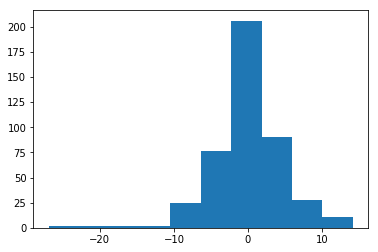

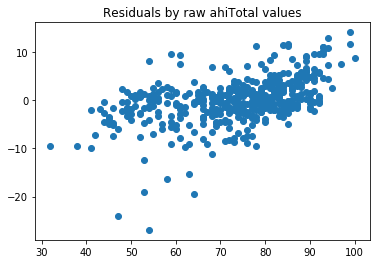

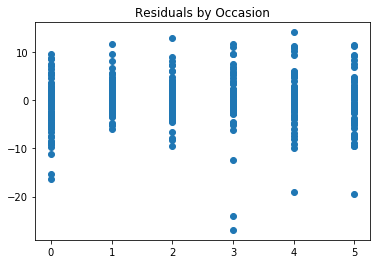

In [32]:
total_participation['residual']=ris_result.resid

# Are residuals normally distributed?
plt.hist(total_participation['residual'])
plt.show()

# Is variance constant for all values of the outcome?
plt.scatter(total_participation['ahiTotal'],total_participation['residual'])
plt.title('Residuals by raw ahiTotal values')
plt.show()

# Is variance constant for all values of the predictors?
plt.scatter(total_participation['occasion'],total_participation['residual'])
plt.title('Residuals by Occasion')
plt.show()

In [33]:
print(ris_result.summary())

                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     ahiTotal  
No. Observations:       444         Method:                 REML      
No. Groups:             74          Scale:                  30.9819   
Min. group size:        6           Likelihood:             -1538.4666
Max. group size:        6           Converged:              Yes       
Mean group size:        6.0                                           
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                   71.165    1.404 50.702 0.000 68.414 73.916
occasion                     0.768    0.218  3.520 0.000  0.340  1.195
Intercept RE               129.553    4.841                           
Intercept RE x occasion RE   0.422    0.487                           
occasion RE            